We Mount the Google Drive from where we want to fetch files

In [ ]:
from google.colab import drive

# Mount Google drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Necessary libraries required for Reading the data and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read all data

In [ ]:
import glob

# Directory where CSV files are stored
file_path = "/content/drive/MyDrive//FDAResearch/Datasets/Project1Datasets/*.csv"

# Getting a list of all CSV files in the folder
csv_files = glob.glob(file_path)

# Dictionary to store data from each CSV file
dataframes = {}

# Loop through each CSV file and read it
for file in csv_files:
    file_name = file.split("/")[-1].replace(".csv", "")
    dataframes[file_name] = pd.read_csv(file, delimiter='\t')  # Read CSV and store in dictionary

# Displaying the keys (file names) to confirm successful loading
print("Loaded datasets:", dataframes.keys())

Loaded datasets: dict_keys(['DEMO_DATA', 'WHITE_BLOOD_CELLS', 'SPO2', 'ALBUMIN', 'BICARBONATE', 'BLOOD_GLUCOSE', 'BLOOD_UREA_NITROGEN', 'CREATININE', 'HEMATROCRIT', 'PLATELET_COUNT', 'POTASSSIUM', 'SODIUM', 'ART_PH', 'CVP', 'DIAS_PRESS', 'HR', 'RESP_RATE', 'SYS_PRESS', 'TEMP'])


In [ ]:
dataframes["WHITE_BLOOD_CELLS"].head(20)  # Check if dataset read properly

,Unnamed: 0,hadm_id,avg_white_blood_cells,std_white_blood_cells
0,0,155703.0,12.161538,2.580226
1,1,130406.0,12.057143,2.805861
2,2,194150.0,13.350000,2.762426
3,3,117336.0,8.850000,0.919239
4,4,167276.0,9.696667,1.705869
5,5,106095.0,6.598333,2.232581
6,6,146688.0,0.300000,0.000000
7,7,109863.0,29.502174,9.063198
8,8,103729.0,7.728571,1.431449
9,9,NaN,7.870552,6.540554


In [ ]:
# Function to get head of whichever dataset we require

def get_dataset_head(dataset_name):

    if dataset_name in dataframes:
        return dataframes[dataset_name].head(20)
    else:
        return f"Dataset '{dataset_name}' not found. Available datasets: {list(dataframes.keys())}"

dataset_name = input("Enter dataset name: ")  # User inputs dataset name
print(get_dataset_head(dataset_name))

Enter dataset name: SPO2
    Unnamed: 0  hadm_id   avg_spo2  std_spo2
0            0   100001  97.604167  0.961815
1            1   100003  98.229167  2.746290
2            2   100006  97.861789  2.564976
3            3   100007  97.960526  2.187484
4            4   100009  96.174603  2.028345
5            5   100010  99.378378  1.621922
6            6   100011  99.094915  1.978922
7            7   100012  98.096774  3.297115
8            8   100016  98.871622  1.526547
9            9   100017  97.818182  2.182576
10          10   100018  98.460784  1.487050
11          11   100020  94.655172  1.395807
12          12   100021  97.123596  2.295352
13          13   100024  97.307692  2.573235
14          14   100028  95.019231  2.270790
15          15   100030  94.671642  2.357374
16          16   100031  98.294118  1.926603
17          17   100033  98.666667  1.460593
18          18   100034  97.153846  2.476611
19          19   100035  95.858268  1.838217


In [ ]:
# Function to get info of whichever dataset we require

def get_dataset_info(dataset_name):

    if dataset_name in dataframes:
        return dataframes[dataset_name].info()
    else:
        return f"Dataset '{dataset_name}' not found. Available datasets: {list(dataframes.keys())}"

dataset_name = input("Enter dataset name: ")  # User inputs dataset name
print(get_dataset_info(dataset_name))

Enter dataset name: SPO2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57832 entries, 0 to 57831
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  57832 non-null  int64  
 1   hadm_id     57832 non-null  int64  
 2   avg_spo2    49001 non-null  float64
 3   std_spo2    48958 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.8 MB
None


In [ ]:
# Function to get null count of whichever dataset we require

def get_dataset_null_count(dataset_name):

    if dataset_name in dataframes:
        return dataframes[dataset_name].isnull().sum()
    else:
        return f"Dataset '{dataset_name}' not found. Available datasets: {list(dataframes.keys())}"

dataset_name = input("Enter dataset name: ")  # User inputs dataset name
print(get_dataset_null_count(dataset_name))

Enter dataset name: SPO2
Unnamed: 0       0
hadm_id          0
avg_spo2      8831
std_spo2      8874
dtype: int64


Data Preprocessing

In [ ]:
# Merge the datasets

# For merging the datasets we keep Demographic data as the main reference

patients_data_new = dataframes["DEMO_DATA"]   # Initializing with the main_reference dataset

# Creating a list of dataframes to be merged.
merged_data = [dataframes["WHITE_BLOOD_CELLS"], dataframes["SPO2"], dataframes["ALBUMIN"], dataframes["BICARBONATE"],
               dataframes["BLOOD_GLUCOSE"], dataframes["BLOOD_UREA_NITROGEN"], dataframes["CREATININE"],
               dataframes["HEMATROCRIT"], dataframes["PLATELET_COUNT"], dataframes["POTASSSIUM"],
               dataframes["SODIUM"], dataframes["ART_PH"], dataframes["CVP"], dataframes["DIAS_PRESS"],
               dataframes["HR"], dataframes["RESP_RATE"], dataframes["SYS_PRESS"], dataframes["TEMP"]]

# Dropping 'Unnamed: 0' from all dataframes except demographic_data
for df in merged_data:
  if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Merging final dataset
for df in merged_data:
  patients_data_new = patients_data_new.merge(df, on="hadm_id", how="left")

# Final merged patients dataset
patients_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               58976 non-null  int64  
 1   hadm_id                  58976 non-null  int64  
 2   age                      58976 non-null  float64
 3   gender                   58976 non-null  object 
 4   marital_status           58976 non-null  object 
 5   religion                 58976 non-null  object 
 6   ethnicity                58976 non-null  object 
 7   avg_white_blood_cells    56990 non-null  float64
 8   std_white_blood_cells    50410 non-null  float64
 9   avg_spo2                 49001 non-null  float64
 10  std_spo2                 48958 non-null  float64
 11  avg_albumin              30996 non-null  float64
 12  std_albumin              16269 non-null  float64
 13  avg_bicarbonate          52825 non-null  float64
 14  std_bicarbonate       

In [ ]:
# DROP COLUMNS WHICH HAVE MORE THAN 70% MISSING DATA

patients_data_col_dropped = patients_data_new.drop(columns=['std_albumin', 'avg_temp','std_temp','std_cvp','avg_cvp','std_art_ph','avg_art_ph'])

patients_data_col_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               58976 non-null  int64  
 1   hadm_id                  58976 non-null  int64  
 2   age                      58976 non-null  float64
 3   gender                   58976 non-null  object 
 4   marital_status           58976 non-null  object 
 5   religion                 58976 non-null  object 
 6   ethnicity                58976 non-null  object 
 7   avg_white_blood_cells    56990 non-null  float64
 8   std_white_blood_cells    50410 non-null  float64
 9   avg_spo2                 49001 non-null  float64
 10  std_spo2                 48958 non-null  float64
 11  avg_albumin              30996 non-null  float64
 12  avg_bicarbonate          52825 non-null  float64
 13  std_bicarbonate          50573 non-null  float64
 14  avg_blood_glucose     

In [ ]:
# Checking for Outliers using InterQuartile range in dataset to perform Imputations accordingly

def check_iqr(column_name):

    df = patients_data_col_dropped

    if column_name not in df.columns:
        return f"Column '{column_name}' not found'. Available columns: {list(df.columns)}"

    # Calculate Q1, Q3, and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Decision on mean or median
    if not outliers.empty:
        decision = "Outliers detected! Consider using the **Median** for imputation."
    else:
        decision = "No major outliers detected. **Mean** might be fine for imputation."

    return {
        "Column": column_name,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers),
        "Imputation Recommendation": decision
    }

# Input to get Column name
column_name = input("Enter column name: ")
result = check_iqr(column_name)

# Printing the result in a readable format (We are checking for avg_albumin in this case)
for key, value in result.items():
    print(f"{key}: {value}")

Enter column name: avg_albumin
Column: avg_albumin
Q1: 2.7
Q3: 3.65
IQR: 0.9499999999999997
Lower Bound: 1.2750000000000006
Upper Bound: 5.074999999999999
Outliers Count: 73
Imputation Recommendation: Outliers detected! Consider using the **Median** for imputation.


In [ ]:
# We fill avg_albumin with Medina values

patients_data_col_dropped['avg_albumin'].fillna(patients_data_col_dropped['avg_albumin'].median(), inplace=True)

<ipython-input-9-9b394293b0e0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patients_data_col_dropped['avg_albumin'].fillna(patients_data_col_dropped['avg_albumin'].median(), inplace=True)


In [ ]:
# Checking dataset info
patients_data_col_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               58976 non-null  int64  
 1   hadm_id                  58976 non-null  int64  
 2   age                      58976 non-null  float64
 3   gender                   58976 non-null  object 
 4   marital_status           58976 non-null  object 
 5   religion                 58976 non-null  object 
 6   ethnicity                58976 non-null  object 
 7   avg_white_blood_cells    56990 non-null  float64
 8   std_white_blood_cells    50410 non-null  float64
 9   avg_spo2                 49001 non-null  float64
 10  std_spo2                 48958 non-null  float64
 11  avg_albumin              58976 non-null  float64
 12  avg_bicarbonate          52825 non-null  float64
 13  std_bicarbonate          50573 non-null  float64
 14  avg_blood_glucose     

In [ ]:
# Drop Rows which have Null Values less than around 10%

In [ ]:
patients_data_col_dropped = patients_data_col_dropped.dropna()
patients_data_col_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29928 entries, 2 to 58973
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               29928 non-null  int64  
 1   hadm_id                  29928 non-null  int64  
 2   age                      29928 non-null  float64
 3   gender                   29928 non-null  object 
 4   marital_status           29928 non-null  object 
 5   religion                 29928 non-null  object 
 6   ethnicity                29928 non-null  object 
 7   avg_white_blood_cells    29928 non-null  float64
 8   std_white_blood_cells    29928 non-null  float64
 9   avg_spo2                 29928 non-null  float64
 10  std_spo2                 29928 non-null  float64
 11  avg_albumin              29928 non-null  float64
 12  avg_bicarbonate          29928 non-null  float64
 13  std_bicarbonate          29928 non-null  float64
 14  avg_blood_glucose        29

In [ ]:
# Label Encoding the columns which have categorical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

patients_data_col_dropped['gender'] = label_encoder.fit_transform(patients_data_col_dropped['gender'])
patients_data_col_dropped['marital_status'] = label_encoder.fit_transform(patients_data_col_dropped['marital_status'])
patients_data_col_dropped['religion'] = label_encoder.fit_transform(patients_data_col_dropped['religion'])
patients_data_col_dropped['ethnicity'] = label_encoder.fit_transform(patients_data_col_dropped['ethnicity'])

patients_data_col_dropped.info()



<class 'pandas.core.frame.DataFrame'>
Index: 29928 entries, 2 to 58973
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               29928 non-null  int64  
 1   hadm_id                  29928 non-null  int64  
 2   age                      29928 non-null  float64
 3   gender                   29928 non-null  int64  
 4   marital_status           29928 non-null  int64  
 5   religion                 29928 non-null  int64  
 6   ethnicity                29928 non-null  int64  
 7   avg_white_blood_cells    29928 non-null  float64
 8   std_white_blood_cells    29928 non-null  float64
 9   avg_spo2                 29928 non-null  float64
 10  std_spo2                 29928 non-null  float64
 11  avg_albumin              29928 non-null  float64
 12  avg_bicarbonate          29928 non-null  float64
 13  std_bicarbonate          29928 non-null  float64
 14  avg_blood_glucose        29

In [ ]:
# Dropping hadm_id and Unnamed:0 column from the dataset before Normalization

patients_data_col_dropped = patients_data_col_dropped.drop(columns=['hadm_id','Unnamed: 0'])
patients_data_col_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47328 entries, 1 to 58975
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      47328 non-null  float64
 1   gender                   47328 non-null  int64  
 2   marital_status           47328 non-null  int64  
 3   religion                 47328 non-null  int64  
 4   ethnicity                47328 non-null  int64  
 5   avg_white_blood_cells    47328 non-null  float64
 6   std_white_blood_cells    47328 non-null  float64
 7   avg_spo2                 47328 non-null  float64
 8   std_spo2                 47328 non-null  float64
 9   avg_albumin              47328 non-null  float64
 10  avg_bicarbonate          47328 non-null  float64
 11  std_bicarbonate          47328 non-null  float64
 12  avg_blood_glucose        47328 non-null  float64
 13  std_blood_glucose        47328 non-null  float64
 14  avg_blood_urea_nitrogen  47

In [ ]:
# Normalizing the data using Min-Max Scaling method

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
patients_data_col_dropped_normalized = pd.DataFrame(scaler.fit_transform(patients_data_col_dropped), columns=patients_data_col_dropped.columns)

# Display the normalized data
print(patients_data_col_dropped_normalized)

       Unnamed: 0   hadm_id       age  gender  marital_status  religion  \
0        0.000000  0.243192  0.788847     1.0            0.25       0.2   
1        0.000034  0.296335  0.574764     1.0            0.25       0.8   
2        0.000102  0.045542  1.000000     1.0            0.25       0.2   
3        0.000119  0.286504  0.749600     1.0            0.25       0.2   
4        0.000153  0.761768  0.882563     1.0            0.25       0.2   
...           ...       ...       ...     ...             ...       ...   
29923    0.999847  0.758848  0.467993     0.0            0.25       0.2   
29924    0.999864  0.927686  0.498123     0.0            0.25       0.2   
29925    0.999898  0.418591  0.855567     0.0            1.00       0.2   
29926    0.999949  0.054443  0.956068     1.0            1.00       0.2   
29927    1.000000  0.226291  0.359204     1.0            0.25       0.8   

       ethnicity  avg_white_blood_cells  std_white_blood_cells  avg_spo2  ...  \
0            1.0  

The Data Preprocessing is done.
Now before we start with K-means Clustering we need to get the optimal value for k using Elbow method

For k = 1, WCSS = 24661.99
For k = 2, WCSS = 17175.08
For k = 3, WCSS = 16060.66
For k = 4, WCSS = 14956.38
For k = 5, WCSS = 13887.35
For k = 6, WCSS = 12732.98
For k = 7, WCSS = 12174.15
For k = 8, WCSS = 12017.81
For k = 9, WCSS = 11605.53
For k = 10, WCSS = 10969.56


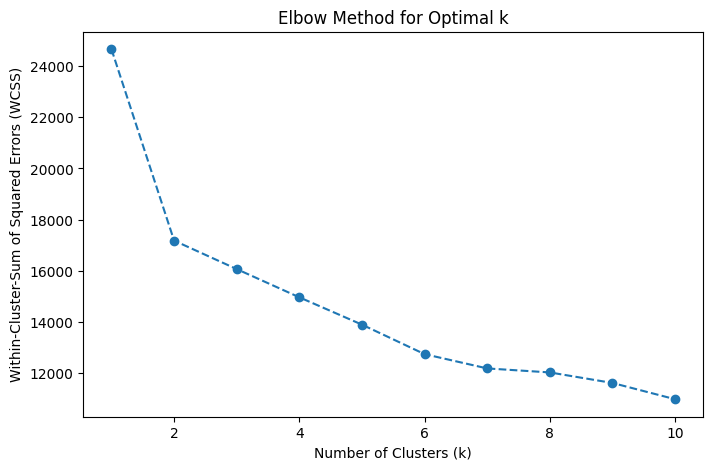

In [ ]:
# Trying to find the Optimal k-Cluster using Elbow Method

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range(1, 11)
wcss = []

# Here we calcualte WCSS for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(patients_data_col_dropped_normalized)
    wcss.append(kmeans.inertia_)
    print(f"For k = {k}, WCSS = {kmeans.inertia_:.2f}")


# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

Check Optimal value for K using Silhoutte index as it is a better approach during Unsupervised Learning

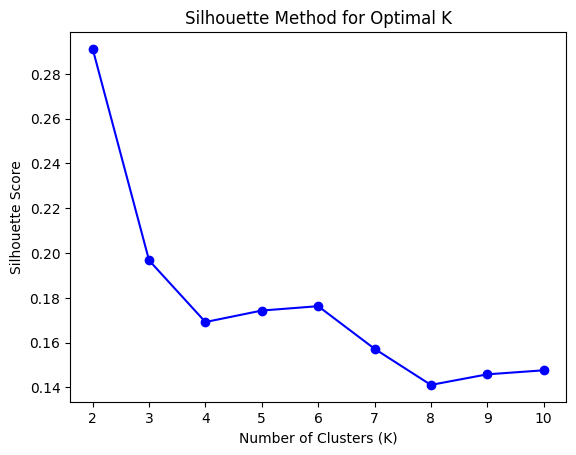

Optimal K using Silhouette Score: 2


In [ ]:
# Checking Optimal K using Silhoutte index

from sklearn.metrics import silhouette_score

def find_optimal_k_silhouette(data, k_range=(2, 11)):
    silhouette_scores = []
    K = range(k_range[0], k_range[1])  # We avoid K=1 (Silhouette Score is not valid)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    # Plot Silhouette Scores
    plt.plot(K, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal K')
    plt.show()

    # Find the best K (highest silhouette score)
    best_k = K[np.argmax(silhouette_scores)]
    print(f"Optimal K using Silhouette Score: {best_k}")

find_optimal_k_silhouette(patients_data_col_dropped_normalized)

K-MEANS CLUSTERING

We take the optimal-k value which we get from the above analysis using Silhoutte score and Elbow method as well and begin the clustering.

While clustering we consider features from the patients data and change the column(feature) names dynamically so as to get the clusters based on the desired features which we want to analyze.

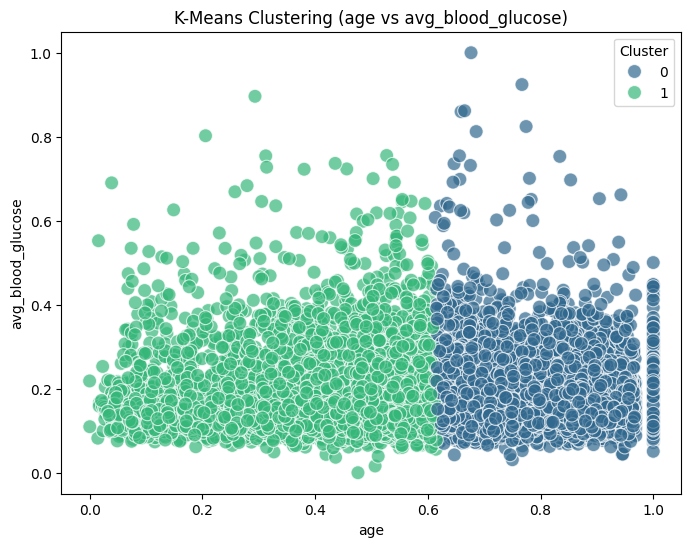

In [ ]:
# K Means Clustering performed

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def apply_kmeans_dynamic(data, selected_features, optimal_k):
    """
    We perform K-Means clustering dynamically based on selected features.

    Parameters:
    - data: DataFrame containing the dataset
    - selected_features: List of feature names(columns) to use for clustering
    - optimal_k: Optimal number of clusters

    Returns:
    - clustered_data: DataFrame with assigned cluster labels
    """

    # Extract only selected features
    X = data[selected_features]

    # Applying K-Means
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Adding cluster labels to the dataset
    clustered_data = data.copy()
    clustered_data["Cluster"] = cluster_labels

    return clustered_data, kmeans.cluster_centers_

def visualize_clusters(clustered_data, x_column, y_column):
    """
    Using this function we visualize K-Means Clusters using Seaborn scatter plot.

    Parameters:
    - clustered_data: DataFrame with cluster labels
    - x_column: Column for X-axis
    - y_column: Column for Y-axis
    """

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=clustered_data[x_column],
        y=clustered_data[y_column],
        hue=clustered_data["Cluster"],
        palette="viridis",
        s=100,
        alpha=0.7
    )

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"K-Means Clustering ({x_column} vs {y_column})")
    plt.legend(title="Cluster")
    plt.show()


selected_features = ["age", "avg_blood_glucose"]  # We change column names here
optimal_k = 2  # The optimal_k we got using the Elbow method and Silhoutte index score

# K-means funxtion call
clustered_df, cluster_centers = apply_kmeans_dynamic(patients_data_col_dropped_normalized, selected_features, optimal_k)

# Visualization
x_axis = "age"  # Changes dynamically
y_axis = "avg_blood_glucose"  # Changes dynamically
visualize_clusters(clustered_df, x_axis, y_axis)



We start with Hierarchical Clustering here.
We perform all three linkage methods for each groups which we want to consider

We start with considering Age and Average Blood Urea Nitrogen data

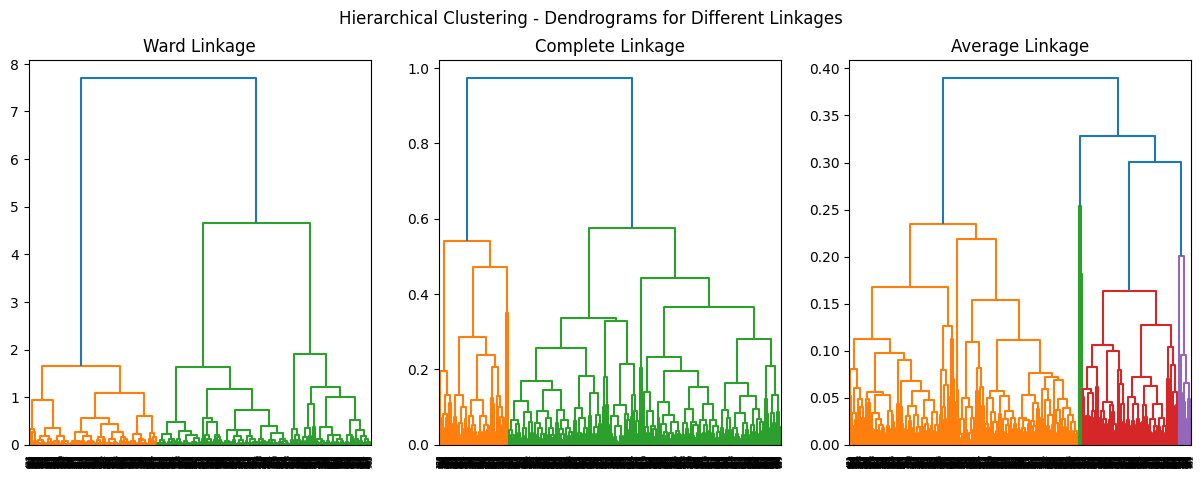

In [ ]:
# import the necessary modules for hierarchical clustering
# and for generating the dendograms

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

def hierarchical_clustering(data, col_x, col_y, sample_size=100):
    """
    Performs Hierarchical Clustering with Average, Ward, and Complete Linkage.

    Parameters:
    - data: DataFrame containing the dataset.
    - col_x: Column name for X-axis.
    - col_y: Column name for Y-axis.
    - sample_size: Number of random samples to take from the dataset.

    Outputs:
    - Dendrogram to determine the optimal number of clusters.
    """

    # Select only required columns
    data = data[[col_x,col_y]].sample(n=sample_size,random_state=42)

    # Define linkage methods
    linkage_methods = {
        "Ward Linkage": "ward",
        "Complete Linkage": "complete",
        "Average Linkage": "average"
    }

# Visualization

    plt.figure(figsize=(15, 5))

    for i, (title, method) in enumerate(linkage_methods.items(), 1):
        plt.subplot(1, 3, i)
        Z = linkage(data, method=method)
        dendrogram(Z)
        plt.title(title)

    plt.suptitle("Hierarchical Clustering - Dendrograms for Different Linkages")
    plt.show()

# Function Call
hierarchical_clustering(patients_data_col_dropped_normalized, "age", "avg_blood_glucose", sample_size=1000)
